# Task2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
covtype_dataset = sklearn.datasets.fetch_covtype()

__2.1__

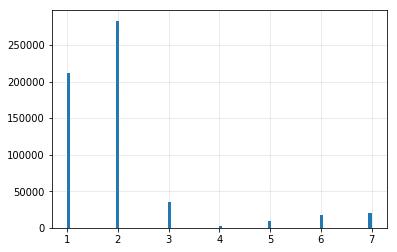

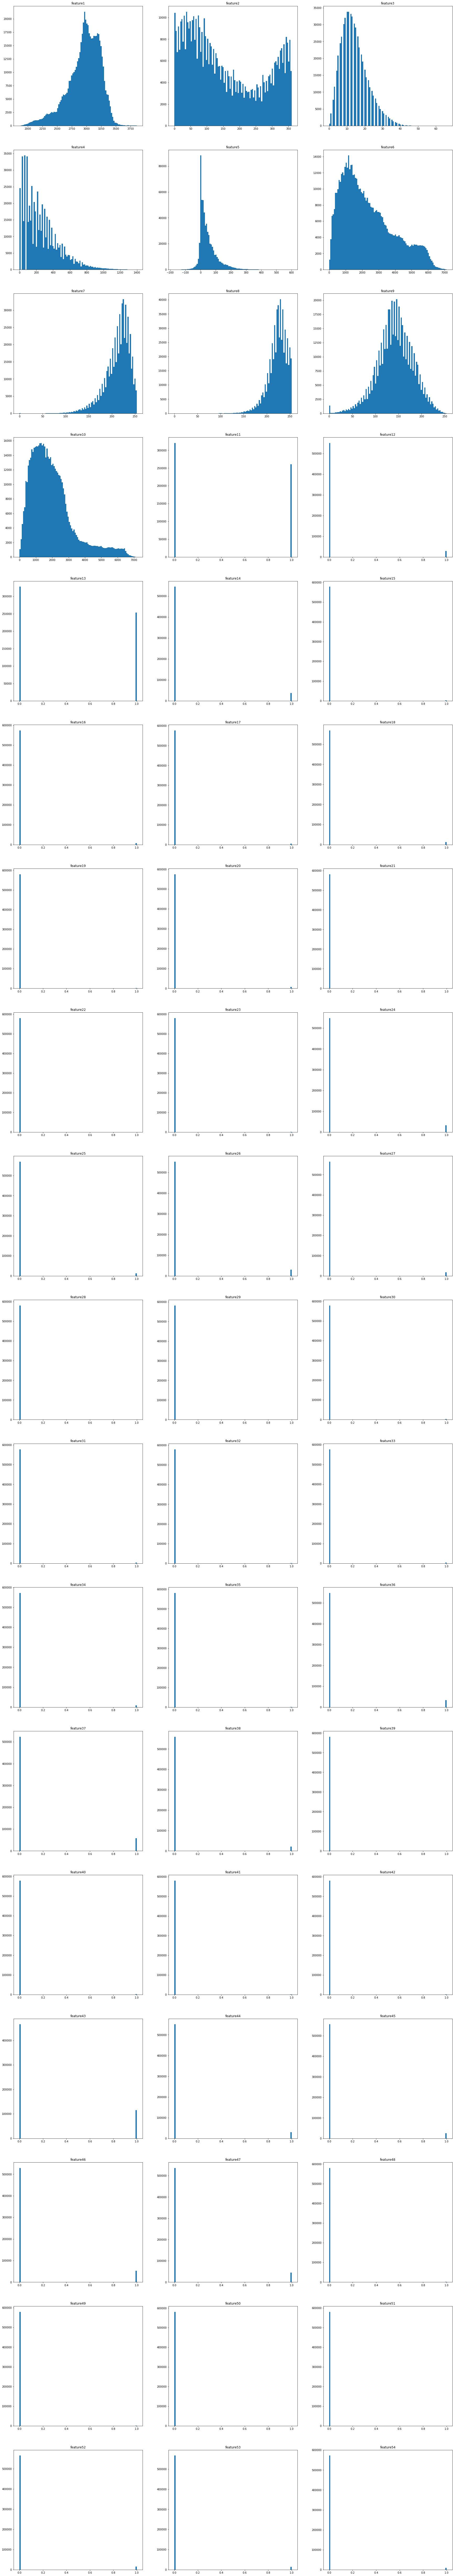

In [7]:
plt.hist(covtype_dataset['target'],bins=100)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.show()

fig, axes = plt.subplots(18,3,figsize=(30,180))
for i in range(0,18):
    for j in range(0,3):
        axes[i,j].hist(covtype_dataset['data'][:,i*3+j],bins=100)
        axes[i,j].set_title('feature{}'.format(i*3+j+1))
plt.show()

__2.2__

In [10]:
X_train, X_test, y_train, y_test = train_test_split(covtype_dataset['data'],covtype_dataset['target'])
LRScore=np.mean(cross_val_score(LogisticRegression(tol=0.1,dual=False,solver='sag'), X_train, y_train))
LinearSVCScore=np.mean(cross_val_score(LinearSVC(tol=0.1,dual=False), X_train, y_train))
NearestCentroidScore=np.mean(cross_val_score(NearestCentroid(), X_train, y_train))

print('LRScore:{}\nLinearSVCScore:{}\nNearestCentroidScore:{}\n'.format(LRScore,LinearSVCScore,NearestCentroidScore))

LRScore:0.6331321130115436
LinearSVCScore:0.528099269612307
NearestCentroidScore:0.19453872731809618



Scaling the Features:

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
LRScore_S=np.mean(cross_val_score(LogisticRegression(tol=0.1,dual=False,solver='sag'), X_train_scaled, y_train))
LinearSVCScore_S=np.mean(cross_val_score(LinearSVC(tol=0.1,dual=False), X_train_scaled, y_train))
NearestCentroidScore_S=np.mean(cross_val_score(NearestCentroid(), X_train_scaled, y_train))

print('LRScore:{}\nLinearSVCScore:{}\nNearestCentroidScore:{}\n'.format(LRScore_S,LinearSVCScore_S,NearestCentroidScore_S))

LRScore:0.7147207572598478
LinearSVCScore:0.712627852387348
NearestCentroidScore:0.5508319986457934



__After scaling, the scores get highly promoted. Scaling works.__

__2.3__

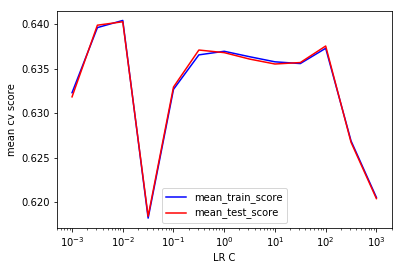

best score:0.6402919962639899
best parameters:{'C': 0.01}


In [24]:
# LR
param_grid = {'C': np.logspace(-3, 3, 13)}
grid = GridSearchCV(LogisticRegression(tol=0.1,dual=False,solver='sag'), param_grid,return_train_score=True)
grid.fit(X_train, y_train)
lr = grid.best_estimator_
plt.plot(param_grid['C'], grid.cv_results_['mean_train_score'],c='blue',label='mean_train_score')
plt.plot(param_grid['C'], grid.cv_results_['mean_test_score'],c='red',label='mean_test_score')
plt.xlabel('LR C')
plt.ylabel('mean cv score')
plt.xscale('log')
plt.legend()
plt.show()
print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

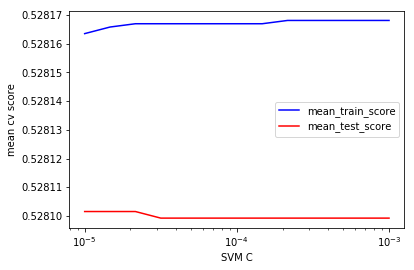

best score:0.528101542366308
best parameters:{'C': 1e-05}


In [25]:
#SVM
param_grid = {'C': np.logspace(-5, -3, 13)}
grid = GridSearchCV(LinearSVC(tol=0.1,dual=False), param_grid,return_train_score=True)
grid.fit(X_train, y_train)
svm = grid.best_estimator_
plt.plot(param_grid['C'], grid.cv_results_['mean_train_score'],c='blue',label='mean_train_score')
plt.plot(param_grid['C'], grid.cv_results_['mean_test_score'],c='red',label='mean_test_score')
plt.xlabel('SVM C')
plt.ylabel('mean cv score')
plt.xscale('log')
plt.legend()
plt.show()
print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

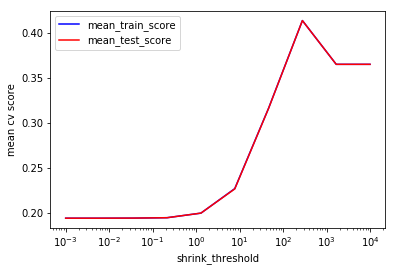

best score:0.4137172152497137
best parameters:{'shrink_threshold': 278.2559402207126}


In [22]:
# NC
param_grid = {'shrink_threshold': np.logspace(-3, 4, 10)}
grid = GridSearchCV(NearestCentroid(), param_grid,return_train_score=True)
grid.fit(X_train, y_train)
svm = grid.best_estimator_
plt.plot(param_grid['shrink_threshold'], grid.cv_results_['mean_train_score'],c='blue',label='mean_train_score')
plt.plot(param_grid['shrink_threshold'], grid.cv_results_['mean_test_score'],c='red',label='mean_test_score')
plt.xlabel('shrink_threshold')
plt.ylabel('mean cv score')
plt.xscale('log')
plt.legend()
plt.show()
print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

__According to the results, the GridSearch only works on the NearestCentroid model while it nearly has no influence on other two models.__

__2.4__

__Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling__

In [13]:
kf=KFold(shuffle=True)
param_grid = {'C': np.logspace(-3, 3, 13)}
grid = GridSearchCV(LogisticRegression(tol=0.1,dual=False,solver='sag'), param_grid, cv=kf)
grid.fit(X_train, y_train)
lr = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))
#SVM
param_grid = {'C': np.logspace(-5, -3, 13)}
grid = GridSearchCV(LinearSVC(tol=0.1,dual=False), param_grid, cv=kf)
grid.fit(X_train, y_train)
svm = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))
# NC
param_grid = {'shrink_threshold': np.logspace(-3, 4, 10)}
grid = GridSearchCV(NearestCentroid(), param_grid, cv=kf)
grid.fit(X_train, y_train)
svm = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))


best score:0.640523775756783
best parameters:{'C': 0.0031622776601683794}
best score:0.5331043076562962
best parameters:{'C': 1e-05}
best score:0.4137860606436126
best parameters:{'shrink_threshold': 278.2559402207126}


__After changing the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling, the parameter of Logistic Regression and inear support vector machines have changed while that of nearest centroids doesn't change at all.__

__Change the random seed of the shuffling__

In [14]:
kf=KFold(random_state=8)
param_grid = {'C': np.logspace(-3, 3, 13)}
grid = GridSearchCV(LogisticRegression(tol=0.1,dual=False,solver='sag'), param_grid, cv=kf)
grid.fit(X_train, y_train)
lr = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))
#SVM
param_grid = {'C': np.logspace(-5, -3, 13)}
grid = GridSearchCV(LinearSVC(tol=0.1,dual=False), param_grid, cv=kf)
grid.fit(X_train, y_train)
svm = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))
# NC
param_grid = {'shrink_threshold': np.logspace(-3, 4, 10)}
grid = GridSearchCV(NearestCentroid(), param_grid, cv=kf)
grid.fit(X_train, y_train)
svm = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

best score:0.6431031831815293
best parameters:{'C': 3.1622776601683795}
best score:0.5316493749985657
best parameters:{'C': 0.001}
best score:0.41334086042973295
best parameters:{'shrink_threshold': 278.2559402207126}


__After changing random seed of the shuffling, the parameter of Logistic Regression and inear support vector machines have changed while that of nearest centroids doesn't change at all.__

__Change the random state of the split into training and test data__

In [15]:
kf=KFold(n_splits=2)

param_grid = {'C': np.logspace(-3, 3, 13)}
grid = GridSearchCV(LogisticRegression(tol=0.1,dual=False,solver='sag'), param_grid, cv=kf)
grid.fit(X_train, y_train)
lr = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))
#SVM
param_grid = {'C': np.logspace(-5, -3, 13)}
grid = GridSearchCV(LinearSVC(tol=0.1,dual=False), param_grid, cv=kf)
grid.fit(X_train, y_train)
svm = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))
# NC
param_grid = {'shrink_threshold': np.logspace(-3, 4, 10)}
grid = GridSearchCV(NearestCentroid(), param_grid, cv=kf)
grid.fit(X_train, y_train)
nc = grid.best_estimator_

print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

best score:0.6352112061942495
best parameters:{'C': 0.01}
best score:0.4979013629093145
best parameters:{'C': 1e-05}
best score:0.47876922794480437
best parameters:{'shrink_threshold': 278.2559402207126}


__After changing random state of the split into training and test data, the parameter of Logistic Regression and inear support vector machines have changed while that of nearest centroids doesn't change at all.__

__2.5__

Choose the model with the best performance, the model after scaling the data with StandardScaler.

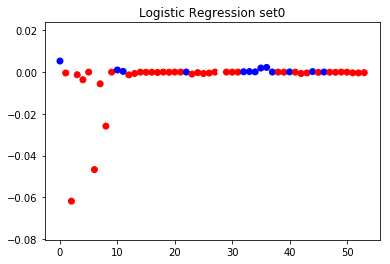

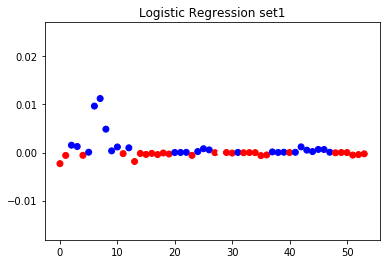

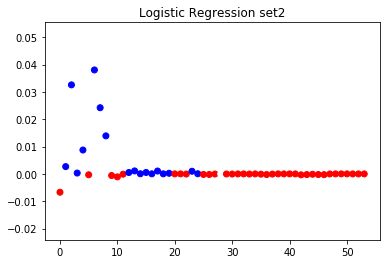

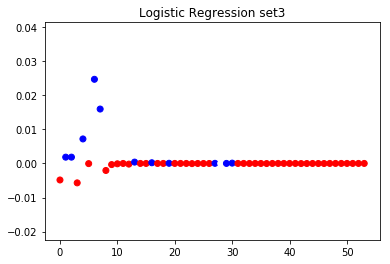

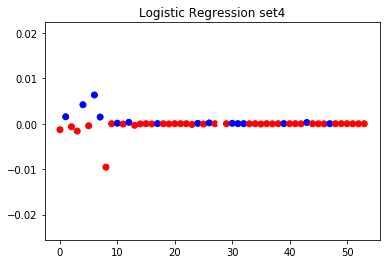

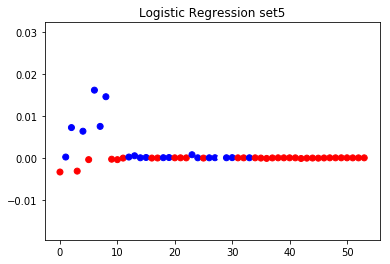

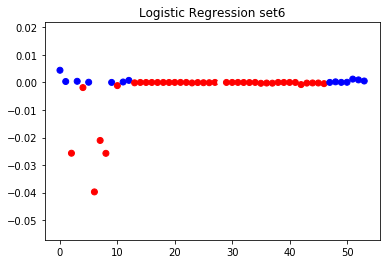

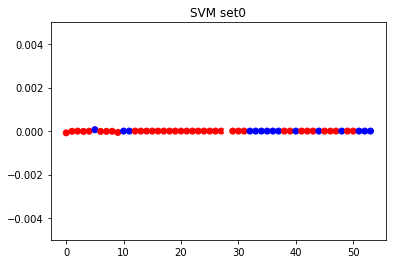

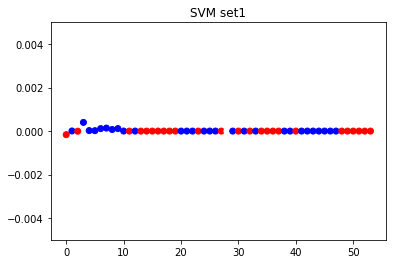

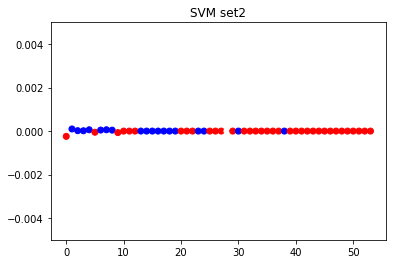

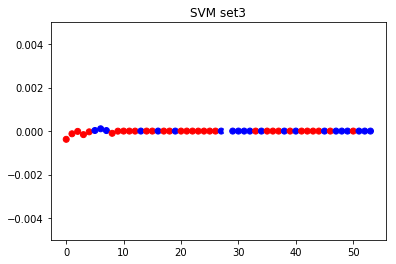

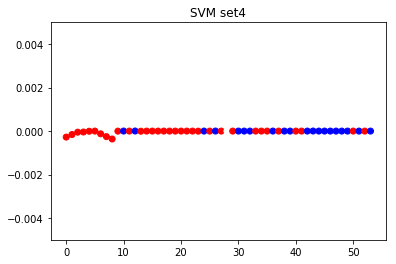

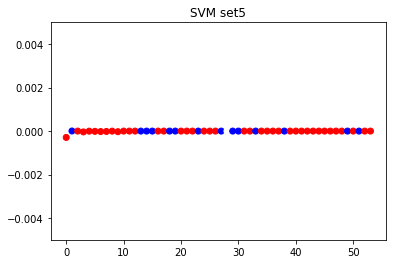

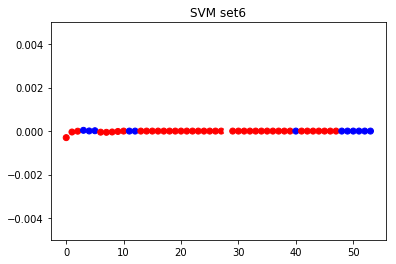

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

lr = LogisticRegression(tol=0.1,dual=False,solver='sag').fit(X_train, y_train)
for i in range(0,7):
    plt.scatter(range(X_train.shape[1]), lr.coef_[i],c=np.sign(lr.coef_[i]), cmap="bwr_r")
    plt.title('Logistic Regression set{}'.format(i))
    plt.show()
svm = LinearSVC(tol=0.1,dual=False).fit(X_train, y_train)
for i in range(0,7):
    plt.scatter(range(X_train.shape[1]),svm.coef_[i], c=np.sign(svm.coef_[i]), cmap="bwr_r")
    plt.ylim(-0.005,0.005)
    plt.title('SVM set{}'.format(i))
    plt.show()